In [1]:
from detector import *
from loader import *

In [2]:
detector = load_detector()

loaded 5646 rows (0.04 s)
using seed: 4233102506


In [3]:
from sklearn import neural_network
from sklearn import ensemble
from sklearn import tree

classifiers = [
    neural_network.MLPClassifier(
        activation='tanh',
        alpha=1e-6,
        hidden_layer_sizes=[28, 28, 28],
        learning_rate='constant',
        solver='lbfgs'
    ),
    ensemble.AdaBoostClassifier(
        base_estimator=tree.DecisionTreeClassifier(max_depth=3),
        n_estimators=46,
        learning_rate=.3
    )
]

titles = (
    'MLP     ',
    'AdaBoost'
)

In [4]:
results = {}
for clf, title in zip(classifiers, titles):
    results[title] = confusion_ratios(detector.classify(clf)[0])

for _ in range(len(titles[0])):
    print(' ', end='')
print('\tTPR\tFPR\tTNR\tFNR\tPPV\tF1')
for title in results.keys():
    print("{0}\t".format(title), end='')
    for x in results[title]:
        print('{0}\t'.format(round(x, 4)), end='')
    print()

        	TPR	FPR	TNR	FNR	PPV	F1
MLP     	0.7459	0.0106	0.9894	0.2541	0.9244	0.8256	
AdaBoost	0.9614	0.0166	0.9834	0.0386	0.9096	0.9348	


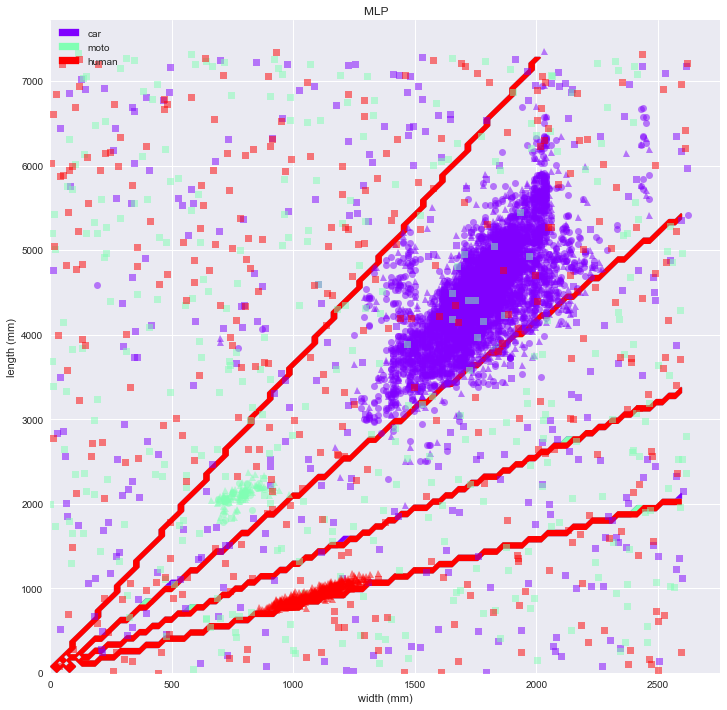

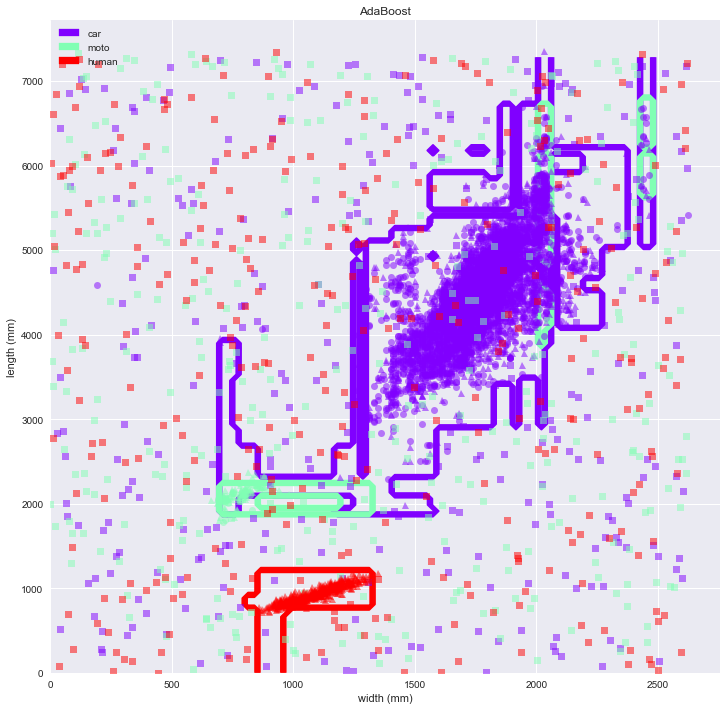

In [5]:
for clf, title in zip(classifiers, titles):
    detector.plot_decision_boundaries(clf, title)

In [116]:
clf = neural_network.MLPClassifier(
    activation='tanh',
    alpha=1e-6,
    hidden_layer_sizes=[28, 28, 28],
    learning_rate='constant',
    solver='lbfgs'
)
X, Y = detector.xtrain.values, detector.ytrain.values
clf.fit(X, Y)

import numpy as np

h = 10  # step size in the mesh
# create a mesh to plot in
x_min, x_max = 0, 8000
y_min, y_max = 0, 8000
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

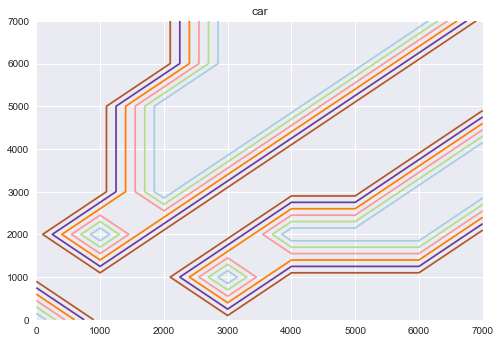

In [93]:
xxx = np.hstack((0 * np.c_[np.ones(len(xx.ravel()))], np.c_[xx.ravel()], np.c_[yy.ravel()]))
Z = clf.predict(xxx)
Z = Z.reshape(xx.shape)
plt.figure()
plt.title("car")
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

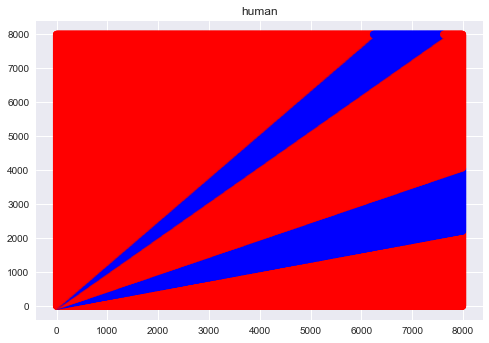

In [117]:
xxx = np.hstack((1 * np.c_[np.ones(len(xx.ravel()))], np.c_[xx.ravel()], np.c_[yy.ravel()]))
Z = clf.predict(xxx)
Z = Z.reshape(xx.shape)
plt.figure()
plt.title("human")
d = {
    False: "blue",
    True: "red"
}
W = []
for i in range(len(Z)):
    for j in range(len(Z[i])):
        W.append(d[Z[i][j]])

plt.scatter(xx.ravel(), yy.ravel(), c=W)


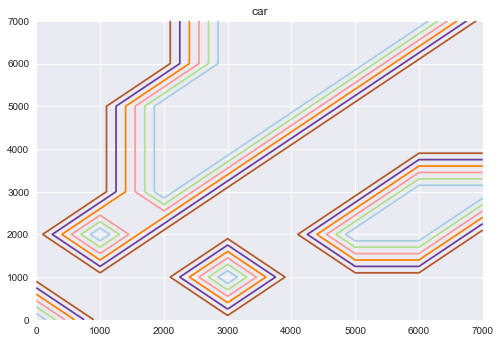

In [95]:
xxx = np.hstack((2 * np.c_[np.ones(len(xx.ravel()))], np.c_[xx.ravel()], np.c_[yy.ravel()]))
Z = clf.predict(xxx)
Z = Z.reshape(xx.shape)
plt.figure()
plt.title("car")
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)